In [39]:
# Data Manipulation
import pandas as pd
# Calculations and Numerical Operations
import numpy as np
# Data Visualization
import plotly
from plotly import tools
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.tools import make_subplots
# Geographic Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import folium
from folium import features
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster, FastMarkerCluster
import gmplot
from IPython.display import display
import gmaps
from IPython.display import IFrame
import seaborn as sns
from geopy.geocoders import Nominatim

In [3]:
df = pd.read_csv('NYPD.csv')
df.columns

C:\Users\Steven\AnacondaNew\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



Index(['Unnamed: 0', 'DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'UNIQUE KEY', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [47]:
west, south, east, north = -84.03, 30.63, -63.77, 50.85

df = df[(df.LATITUDE> south) & (df.LATITUDE < north)]
df = df[(df.LONGITUDE> west) & (df.LONGITUDE < east)]

data = {'lon': df['LONGITUDE'].values, 'lat': df['LATITUDE'].values}
mf = pd.DataFrame(data, columns=['lon', 'lat'])
mf.head()

,lon,lat
0,-73.938991,40.816662
1,-73.952210,40.597130
2,-73.916184,40.842335
3,-73.946481,40.631708
4,-74.012867,40.717175


In [48]:
hm = folium.Map(location=[40.731950, -73.890480],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")
heat_map = HeatMap(list(zip(mf.lat.values, mf.lon.values)), 
     min_opacity=0.2,
     radius=9, blur=15,
     max_zoom=1
)
hm.add_child(heat_map)
hm.save('heatmap.html')
IFrame(src='./heatmap.html', width=1100, height=900)

In [ ]:
cluster = folium.Map(location=[40.731950, -73.890480],
                        zoom_start=12,
                        tiles="CartoDB dark_matter")
mc = MarkerCluster()
for ind,row in mf.iterrows():
    mc.add_child(folium.CircleMarker(location=[row['lat'],row['lon']],
                        radius=1,color='#3185cc'))
cluster.add_child(mc)
cluster.save('cluster.html')
IFrame(src='./cluster.html', width=1100, height=900)

In [49]:
print(df['BOROUGH'].value_counts())

BROOKLYN         31634
QUEENS           27250
MANHATTAN        24451
BRONX            14057
STATEN ISLAND     4554
Name: BOROUGH, dtype: int64


In [50]:
print(df['NUMBER OF PERSONS INJURED'].value_counts())

0.0     105962
1.0      19549
2.0       3606
3.0       1207
4.0        495
5.0        195
6.0         71
7.0         26
8.0         14
10.0         8
9.0          7
11.0         3
12.0         2
13.0         1
19.0         1
Name: NUMBER OF PERSONS INJURED, dtype: int64


In [51]:
corr = df[['BOROUGH', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']]

In [52]:
df['CROSS STREET NAME']

0         LENOX AVENUE                    
1                                 AVENUE V
4         EAST 172 STREET                 
5         AVENUE H                        
7         CHAMBERS STREET                 
8                                      NaN
9         3 AVENUE                        
10        38 STREET                       
11                             MAIN STREET
12                                     NaN
13        BRIGGS AVENUE                   
15                                     NaN
16        LIBERTY AVENUE                  
17                                     NaN
18        WEST 125 STREET                 
19                                     NaN
22        GRAND AVENUE                    
23                                     NaN
24                                     NaN
27                           OCEAN PARKWAY
28        9 AVENUE                        
29                         FAIRMOUNT PLACE
30                          HARDING AVENUE
31         

In [53]:
df.isna().sum()

Unnamed: 0                            0
DATE                                  0
TIME                                  0
BOROUGH                           29202
ZIP CODE                          29219
LATITUDE                              0
LONGITUDE                             0
LOCATION                              0
ON STREET NAME                    23735
CROSS STREET NAME                 42089
OFF STREET NAME                  113344
NUMBER OF PERSONS INJURED             1
NUMBER OF PERSONS KILLED              1
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1       317
CONTRIBUTING FACTOR VEHICLE 2     17731
CONTRIBUTING FACTOR VEHICLE 3    122788
CONTRIBUTING FACTOR VEHICLE 4    129382
CONTRIBUTING FACTOR VEHICLE 5    130713
UNIQUE KEY                            0


In [54]:
mf.head()

,lon,lat
0,-73.938991,40.816662
1,-73.952210,40.597130
2,-73.916184,40.842335
3,-73.946481,40.631708
4,-74.012867,40.717175


In [55]:
mf = np.round(mf, decimals=5)
mf['location'] = mf['lat'].astype(str) + ', ' + mf['lon'].astype(str)
mf['location'].head()

0    40.81666, -73.93899
1    40.59713, -73.95221
2    40.84234, -73.91618
3    40.63171, -73.94648
4    40.71718, -74.01287
Name: location, dtype: object

In [56]:
frequency = mf['location'].value_counts()

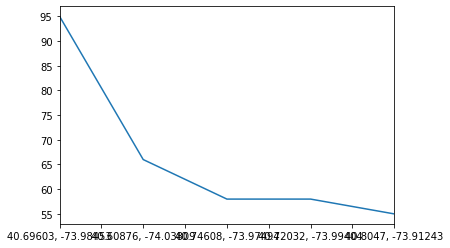

In [57]:
frequency.nlargest(5).plot()

In [58]:
geolocator = Nominatim()
for c in frequency.nlargest(10).index.tolist():
    location = geolocator.reverse(c)
    print(location.address + "\n")

C:\Users\Steven\AnacondaNew\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.



Flatbush Avenue Extension, Downtown Brooklyn, BK, Kings County, NYC, New York, 11201-1832, USA

Verrazzano-Narrows Bridge (Staten Island Bound), Fort Hamilton, BK, Kings County, NYC, New York, 11252, USA

Royal Tuina, 242, East 36th Street, Murray Hill, Manhattan Community Board 6, Manhattan, New York County, NYC, New York, 10016, USA

Kenmare Street, Little Italy, Manhattan Community Board 3, Manhattan, New York County, NYC, New York, 10002, USA

East 138th Street, Port Morris, The Bronx, Bronx County, NYC, New York, 10454, USA

57th Street, 6th Avenue, Midtown, Manhattan Community Board 5, Manhattan, New York County, NYC, New York, 10019, USA

Veritable, 1201, 2nd Avenue, Lenox Hill, Manhattan Community Board 8, Manhattan, New York County, NYC, New York, 10035, USA

Metropolitan Avenue, Rego Park, Queens, Queens County, NYC, New York, 11415, USA

Pennsylvania Avenue, East New York, BK, Kings County, NYC, New York, 11239, USA

Jamaica Avenue, Broadway Junction, BK, Kings County, NYC, 